In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("heart.csv")

columns_to_drop = ['restecg', 'ca', 'thal', 'fbs']  
data = data.drop(columns=columns_to_drop, errors='ignore')  # 'errors=ignore' untuk skip jika kolom tidak ada
print(data.head(10))

   age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  target
0   63    1   3       145   233      150      0      2.3      0       1
1   37    1   2       130   250      187      0      3.5      0       1
2   41    0   1       130   204      172      0      1.4      2       1
3   56    1   1       120   236      178      0      0.8      2       1
4   57    0   0       120   354      163      1      0.6      2       1
5   57    1   0       140   192      148      0      0.4      1       1
6   56    0   1       140   294      153      0      1.3      1       1
7   44    1   1       120   263      173      0      0.0      2       1
8   52    1   2       172   199      162      0      0.5      2       1
9   57    1   2       150   168      174      0      1.6      2       1


In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [32]:
data.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.132013,244.767868,149.646865,0.326733,1.004290,1.399340,0.544554
std,9.082101,0.466011,1.032052,15.062422,43.308066,22.905161,0.469794,1.060839,0.616226,0.498835
min,29.000000,0.000000,0.000000,108.000000,175.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,153.000000,0.000000,0.800000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,160.000000,326.729000,202.000000,1.000000,3.400000,2.000000,1.000000


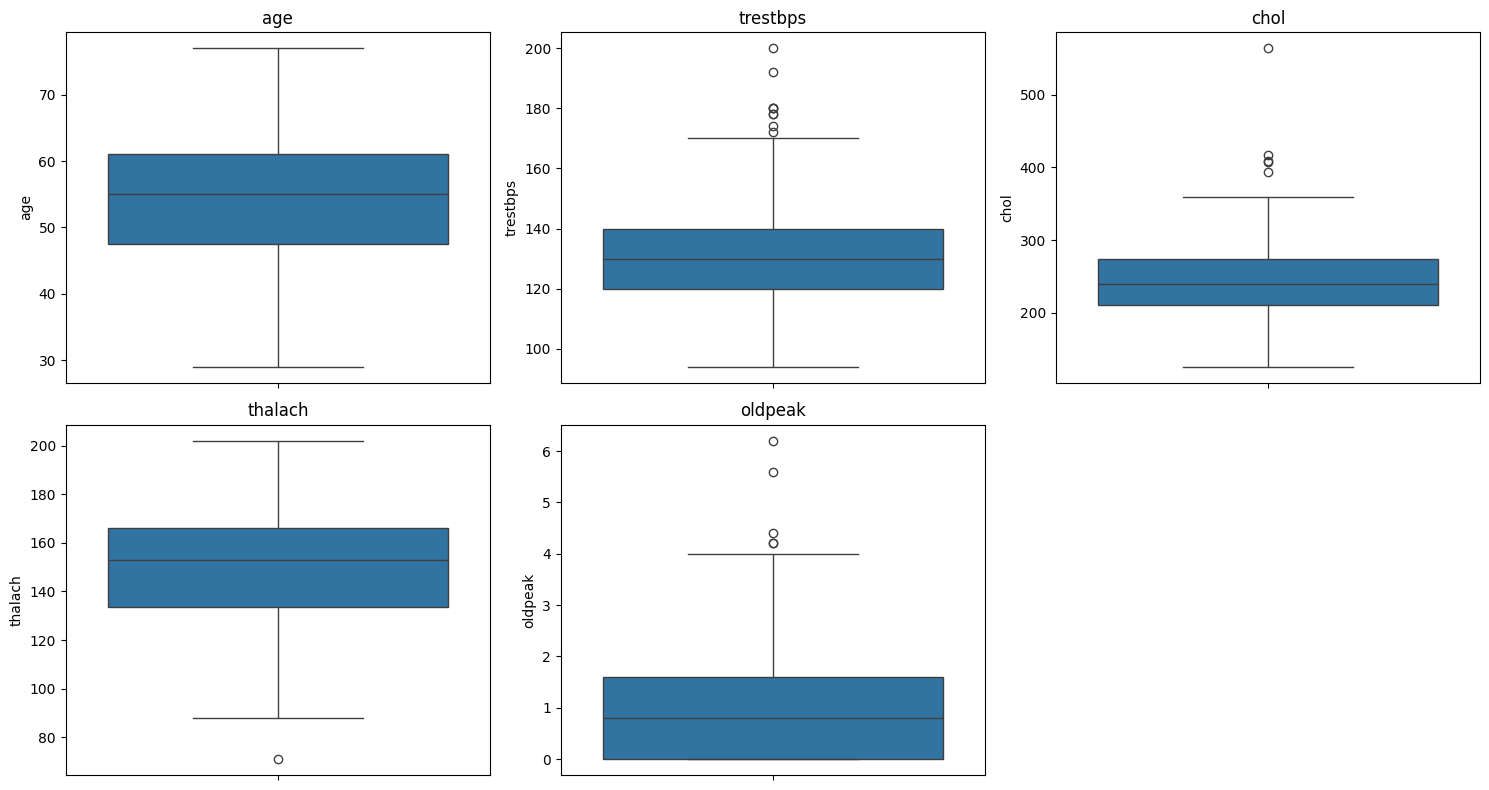

In [17]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

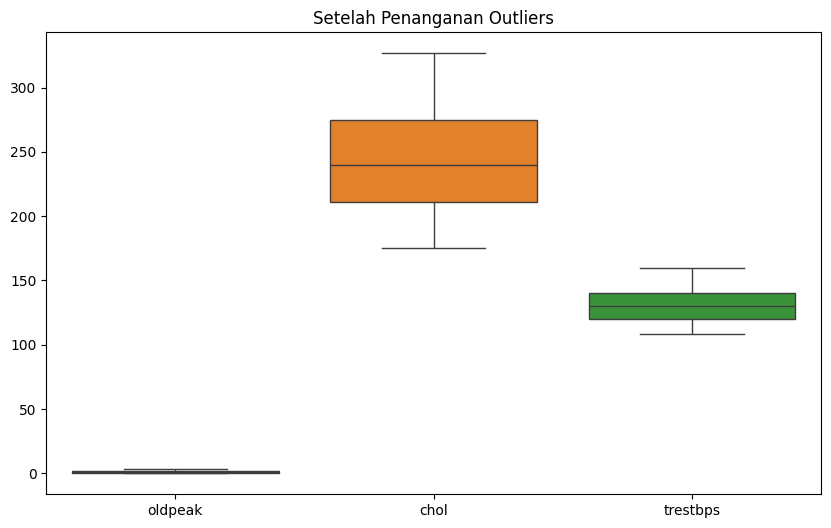

In [26]:
cols_with_outliers = ['oldpeak', 'chol', 'trestbps']
def cap_outliers(df, col):
    lower = df[col].quantile(0.05)  # Batas bawah (5%)
    upper = df[col].quantile(0.95)  # Batas atas (95%)
    df[col] = np.where(df[col] > upper, upper, 
                      np.where(df[col] < lower, lower, df[col]))
    return df

for col in cols_with_outliers:
    data = cap_outliers(data, col)
    
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[cols_with_outliers])
plt.title("Setelah Penanganan Outliers")
plt.show()

In [34]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
target        int64
dtype: object

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.8688524590163934


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Pisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)
y = data['target']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8689
Precision: 0.9286
Recall: 0.8125
F1-Score: 0.8667


In [52]:
joblib.dump((model), "prediksi-jantung.joblib")

['prediksi-jantung.joblib']